# Final Project - Social Media Sentiment Analysis

### Mengheng Xue

In [18]:
import twitter_credentials
import analyzing_twitter_data
import tweepy_streamer
import sentiment_anaylsis_twitter_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
twitter_client = sentiment_anaylsis_twitter_data.TwitterClient()
tweet_analyzer = sentiment_anaylsis_twitter_data.TweetAnalyzer()
api = twitter_client.get_twitter_client_api()
tweets = api.user_timeline(screen_name="realDonaldTrump", count=100)

df = tweet_analyzer.tweets_to_data_frame(tweets)
df['sentiment'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']])
    
df.head(100)

,tweets,id,len,date,source,likes,retweets,sentiment
0,"After a great rally in Panama City Beach, Flor...",1126325461217202176,140,2019-05-09 03:18:10,Twitter for iPhone,58761,16980,1
1,MAKE AMERICA GREAT AGAIN! https://t.co/gOXXHnHHG5,1126322322636324864,49,2019-05-09 03:05:42,Twitter for iPhone,81324,18393,1
2,"Beautiful evening in Panama City Beach, Florid...",1126303605068390401,89,2019-05-09 01:51:19,Twitter for iPhone,63482,16157,1
3,"Big crowds in Panama City Beach, Florida. See ...",1126268756257382400,130,2019-05-08 23:32:51,Twitter for iPhone,44413,11092,0
4,"Just landed in Panama City Beach, Florida for ...",1126264006988181505,136,2019-05-08 23:13:58,Twitter for iPhone,43826,9035,1
5,Big announcement today: Drug companies have to...,1126230693959200769,140,2019-05-08 21:01:36,Twitter for iPhone,122738,27955,1
6,"“The reality is, with the Tariffs, the economy...",1126229955677786113,139,2019-05-08 20:58:40,Twitter for iPhone,57252,13480,1
7,Getting ready to leave for one of my favorite ...,1126207770783621121,140,2019-05-08 19:30:31,Twitter for iPhone,70835,15675,1
8,Thank you @NewtGingrich &amp; @FoxandFriends! ...,1126183652042391553,69,2019-05-08 17:54:40,Twitter Media Studio,42028,11666,0
9,Our Nation grieves at the unspeakable violence...,1126180647956099073,140,2019-05-08 17:42:44,Twitter for iPhone,70896,14939,-1


126.88
163422
46738


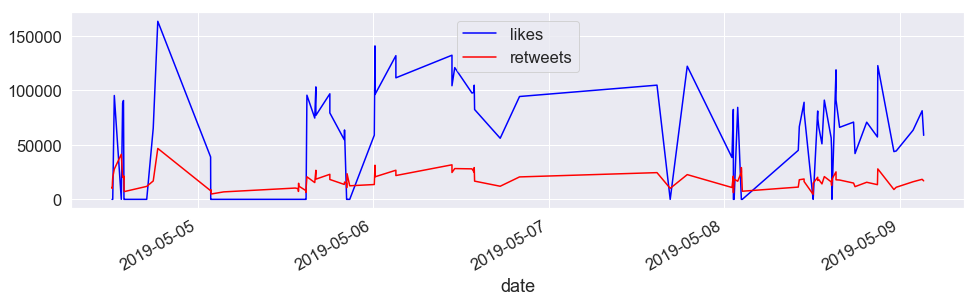

In [21]:
# ====================plot setting ===============
pd.options.display.max_colwidth = 60

plt.rcParams['figure.figsize'] = (30, 10)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.5)

# Get average length over all tweets:
print(np.mean(df['len']))

# Get the number of likes for the most liked tweet:
print(np.max(df['likes']))

# Get the number of retweets for the most retweeted tweet:
print(np.max(df['retweets']))
    
# Layered Time Series:
time_likes = pd.Series(data=df['likes'].values, index=df['date'])
time_likes.plot(figsize=(16, 4), color='b', label="likes", legend=True)

time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(16, 4), color='r', label="retweets", legend=True)
plt.show()